<a href="https://colab.research.google.com/github/thlavlu/BRACU/blob/master/18301274_KaziRishadBinSakib_Assign05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
heartDisease = pd.read_csv('/content/sample_data/heart disease classification dataset.csv')
heartDisease.head(10)

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,male,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,yes
1,1,37,male,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,yes
2,2,41,female,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,yes
3,3,56,male,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,yes
4,4,57,female,0,NaN,354.0,0,1,163.0,1,0.6,2,0,2,yes
5,5,57,male,0,140.0,192.0,0,1,148.0,0,0.4,1,0,1,yes
6,6,56,female,1,140.0,294.0,0,0,153.0,0,1.3,1,0,2,yes
7,7,44,male,1,120.0,263.0,0,1,173.0,0,0.0,2,0,3,yes
8,8,52,male,2,172.0,199.0,1,1,162.0,0,0.5,2,0,3,yes
9,9,57,male,2,150.0,168.0,0,1,174.0,0,1.6,2,0,2,yes


In [ ]:
from sklearn.impute import SimpleImputer
heartDisease.fillna(heartDisease.mean())
impute = SimpleImputer(missing_values=np.nan, strategy='mean')
impute.fit(heartDisease[['trestbps']], heartDisease[['chol']])
impute.fit(heartDisease[['thalach']])
heartDisease['trestbps']=impute.transform(heartDisease[['trestbps']])
heartDisease['chol']=impute.transform(heartDisease[['chol']])
heartDisease['thalach']=impute.transform(heartDisease[['thalach']])
heartDisease.drop(['thalach'], axis=1)
print(heartDisease.isnull().sum())


from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
heartDisease['sex']=encoder.fit_transform(heartDisease['sex'])
print(heartDisease[['sex']].head())
heartDisease['target']=encoder.fit_transform(heartDisease['target'])
print(heartDisease[['target']].head())

X = heartDisease.iloc[:, :-1]
y = heartDisease.iloc[:, -1]


from sklearn.preprocessing import MinMaxScaler

scaler= MinMaxScaler()
scaler.fit(heartDisease)
MinMaxScaler()
X_trained_scaled=scaler.transform(heartDisease)
X_trained_scaled



Unnamed: 0    0
age           0
sex           0
cp            0
trestbps      0
chol          0
fbs           0
restecg       0
thalach       0
exang         0
oldpeak       0
slope         0
ca            0
thal          0
target        0
dtype: int64
   sex
0    1
1    1
2    0
3    1
4    0
   target
0       1
1       1
2       1
3       1
4       1


array([[0.        , 0.70833333, 1.        , ..., 0.        , 0.33333333,
        1.        ],
       [0.00331126, 0.16666667, 1.        , ..., 0.        , 0.66666667,
        1.        ],
       [0.00662252, 0.25      , 0.        , ..., 0.        , 0.66666667,
        1.        ],
       ...,
       [0.99337748, 0.8125    , 1.        , ..., 0.5       , 1.        ,
        0.        ],
       [0.99668874, 0.58333333, 1.        , ..., 0.25      , 1.        ,
        0.        ],
       [1.        , 0.58333333, 0.        , ..., 0.25      , 0.66666667,
        0.        ]])

In [ ]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict(x_test)
print(predictions)
print( accuracy_score(y_test, predictions))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
0.5245901639344263


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
from sklearn.tree import DecisionTreeClassifier

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

clf = DecisionTreeClassifier(criterion='entropy',random_state=1)
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print(accuracy_score(y_pred,y_test))

1.0


<BarContainer object of 2 artists>

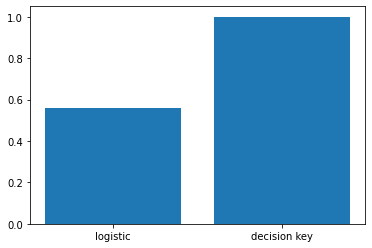

In [ ]:
import matplotlib.pyplot as plt
plt.bar(x = ["logistic", "decision key"], height = [ (accuracy_score(y_test, predictions)), (accuracy_score(y_pred,y_test))])